## Assignment 2 - Epipolar Geometry and 3D Reconstruction

First name: Marcel
<br>
Last name: Zauder
<br>
Matriculation number: 16-124-836

In [43]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from data import load_homogeneous_coordinates
from utils import eight_points_algorithm, right_epipole, plot_epipolar_line
from utils import get_normalization_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part I: The Eight Point Algorithm

### Load Data

In [44]:
data_dir = './merton_college/'
img1, img2, x1, x2 = load_homogeneous_coordinates(data_dir)

### Compute Test Normalization Matrix

In [45]:
print(get_normalization_matrix(x1))

[[ 0.00507549  0.         -2.74324508]
 [ 0.          0.00507549 -1.28465616]
 [ 0.          0.          1.        ]]


### Estimate the fundamental matrix F

In [46]:
F = eight_points_algorithm(x1, x2) 
assert np.linalg.matrix_rank(F) == 2
print('Estimated fundamental matrix: ')
print(F)

Estimated fundamental matrix: 
[[-1.13842131e-09 -3.55063867e-07  1.46207354e-04]
 [ 1.07949189e-06  4.57307917e-08 -4.05769576e-03]
 [-4.48937328e-04  3.80280565e-03  1.59619094e-01]]


### Plot epipoles and epipolar lines

In [47]:
# compute the epipole
# TODO: implement this function
e = right_epipole(F)  

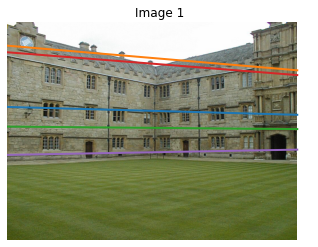

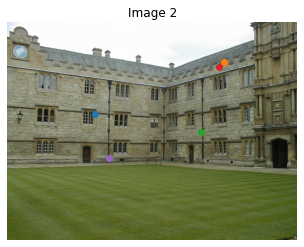

In [48]:
plt.figure()
plt.imshow(img1)
plt.title('Image 1')

# plot each line individually, this gives nice colors
for i in range(100, 105): 
    plot_epipolar_line(img1, F.T, x2[:, i], e)

plt.axis('off')
plt.figure()
plt.imshow(img2)
plt.title('Image 2')

# plot each point individually, this gives same colors as the lines 
for i in range(100, 105):
    plt.plot(x2[0, i], x2[1, i], 'o')
    plt.axis('off')

In [49]:
%matplotlib notebook
from ipywidgets import *

fig, ax = plt.subplots()
ax.imshow(img1)

e2 = right_epipole(F.T)
print(e2)
print(e)

fig2, ax2 = plt.subplots()
ax2.imshow(img2)

def onclick(event):
    ax.plot(event.xdata, event.ydata, 'o')
    plot_epipolar_line(img2, F, np.array([event.xdata, event.ydata, 1]), e, ax2)
    ax2.imshow(img2)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>

[1.07652274e+04 4.27231269e+02 1.00000000e+00]
[3.74195816e+03 3.99779989e+02 1.00000000e+00]


<IPython.core.display.Javascript object>